In [2]:
!nvidia-smi

Thu Jul 13 01:40:44 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 L...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8               10W /  N/A|      0MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import pandas as pd
import numpy as np

In [4]:
# df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/06_stock_price_expectation/samsung_electronics.csv")

# Use reverse order
df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/06_stock_price_expectation/samsung_electronics_reverse_order.csv")

In [5]:
df

,Unnamed: 0,Date,Volume,Open,High,Low,Close
0,493,20230530,27476897,71300,72300,71200,72300
1,492,20230526,19549511,69800,70400,69500,70300
2,491,20230525,14231160,69900,70000,68700,68800
3,490,20230524,8192896,68100,68700,68000,68500
4,489,20230523,8561643,68500,68700,68100,68400
...,...,...,...,...,...,...,...
489,4,20210607,16496197,82700,82800,81600,81900
490,3,20210604,18112259,82700,82700,81500,82200
491,2,20210603,29546007,81300,83000,81100,82800
492,1,20210602,16414644,80400,81400,80300,80800


In [6]:
print(df.shape)

(494, 7)


In [7]:
import numpy as np

def MinMaxScaler(data):

    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)             # To prevent DivideByZero exception

In [8]:
# Dataset which is only useful
dfx = df[["Volume", "Open", "High", "Low", "Close"]]

dfx = MinMaxScaler(dfx)

dfx

,Volume,Open,High,Low,Close
0,0.391134,0.612903,0.629630,0.642384,0.650165
1,0.248305,0.564516,0.565657,0.586093,0.584158
2,0.152484,0.567742,0.552189,0.559603,0.534653
3,0.043691,0.509677,0.508418,0.536424,0.524752
4,0.050335,0.522581,0.508418,0.539735,0.521452
...,...,...,...,...,...
489,0.193293,0.980645,0.983165,0.986755,0.966997
490,0.222410,0.980645,0.979798,0.983444,0.976898
491,0.428413,0.935484,0.989899,0.970199,0.996700
492,0.191824,0.906452,0.936027,0.943709,0.930693


In [9]:
dfy = dfx[["Close"]]                            # We are going to expect the close price
dfx = dfx[["Volume", "Open", "High", "Low"]]    # Only given data

In [10]:
dfx.describe()

,Volume,Open,High,Low
count,494.000000,494.000000,494.000000,494.000000
mean,0.161701,0.491550,0.485639,0.502098
std,0.098114,0.256053,0.265796,0.260946
min,0.000000,0.000000,0.000000,0.000000
25%,0.097524,0.274194,0.259259,0.281457
50%,0.140432,0.458065,0.449495,0.473510
75%,0.200042,0.709677,0.719697,0.725166
max,1.000000,1.000000,1.000000,1.000000


In [11]:
X = dfx.values.tolist()     # input
y = dfy.values.tolist()     # (expected) output

In [12]:
print(X[:3])
print(y[:3])

[[0.39113374598922895, 0.6129032258044745, 0.6296296296275097, 0.6423841059581378], [0.24830501614325634, 0.564516129030437, 0.565656565654661, 0.5860927152298474], [0.1524836043682957, 0.5677419354820396, 0.5521885521866929, 0.5596026490047695]]
[[0.6501650164995044], [0.5841584158396562], [0.5346534653447701]]


In [13]:
# OHLVC
# Open-High-Low-Volume-Close

# We are going to expect the next day's close price with the previous OHLVC data of $window_size days.

window_size = 7

data_X = []
data_y = []

for _seq in range(len(y) - window_size):
    _X = X[_seq : _seq + window_size]
    _y = y[_seq + window_size]
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.21294611377841643, 0.9354838709647242, 0.9360269360237844, 0.9635761589372067], [0.1646931455151014, 0.9419354838679292, 0.9562289562257366, 0.9701986754934762], [0.12635995761002125, 0.9677419354807492, 0.9764309764276887, 0.9933774834404192], [0.193293066373064, 0.9806451612871592, 0.9831649831616728, 0.9867549668841498], [0.22240986260480322, 0.9806451612871592, 0.9797979797946808, 0.983443708606015], [0.42841316611732666, 0.9354838709647242, 0.9898989898956568, 0.9701986754934762], [0.19182371551704053, 0.9064516129003017, 0.9360269360237844, 0.9437086092683983]] -> [0.9240924092378743]


In [14]:
# 10-days OHLVC data

# With this data,
data_X[0]

[[0.39113374598922895,
  0.6129032258044745,
  0.6296296296275097,
  0.6423841059581378],
 [0.24830501614325634,
  0.564516129030437,
  0.565656565654661,
  0.5860927152298474],
 [0.1524836043682957,
  0.5677419354820396,
  0.5521885521866929,
  0.5596026490047695],
 [0.043691427780116227,
  0.5096774193531945,
  0.5084175084157966,
  0.5364238410578264],
 [0.05033518975216008,
  0.5225806451596046,
  0.5084175084157966,
  0.5397350993359611],
 [0.15679236454286077,
  0.519354838708002,
  0.5185185185167727,
  0.5364238410578264],
 [0.2627157278592777,
  0.49999999999838707,
  0.49831649831482044,
  0.5198675496671528]]

In [15]:
# The next day's close price data

# the model is going to expect a value as near to this value as possible
print(data_y[0])

[0.4488448844869675]


In [16]:
print('Total size of the data :', len(data_X), len(data_y))

Total size of the data : 487 487


In [17]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, train_size = 0.2, random_state = 0xCAFE)

In [18]:
train_size = int(len(data_y) * 0.7)             # Train dataset will take 70% of proportion
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('Train dataset size :', train_X.shape, train_y.shape)
print('Test dataset size :', test_X.shape, test_y.shape)

Train dataset size : (340, 7, 4) (340, 1)
Test dataset size : (147, 7, 4) (147, 1)


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation='tanh', return_sequences = True, input_shape = (window_size, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units = 32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units = 1))                     # The output is only a single value.
model.summary()

# [ref] https://stackoverflow.com/questions/68844792/lstm-will-not-use-cudnn-kernels-since-it-doesnt-meet-the-criteria-it-will-use
# cuDNN acceleration only works for tanh in activation function.
# temporarily replaced the activation function relu to tanh(tangent hyperbolic).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             17664     
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow._api.v2.config import optimizer
from tensorflow import keras

model.compile(loss = "mean_squared_error",         # <-- REGRESSION
              metrics = "mae",
              optimizer = "adam")

early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 16, restore_best_weights = True, mode = "auto")

history = model.fit(train_X, train_y,
                    epochs = 500,
                    steps_per_epoch = 50,
                    batch_size = 8,
                    validation_data = (test_X, test_y),
                    callbacks = [early_stopping_checkpoint])

Epoch 1/500
50/50 [==============================] - 5s 18ms/step - loss: 0.0201 - mae: 0.0926 - val_loss: 0.0057 - val_mae: 0.0564
Epoch 2/500
50/50 [==============================] - 1s 10ms/step - loss: 0.0032 - mae: 0.0439 - val_loss: 0.0037 - val_mae: 0.0430
Epoch 3/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0437 - val_loss: 0.0062 - val_mae: 0.0691
Epoch 4/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0440 - val_loss: 0.0037 - val_mae: 0.0483
Epoch 5/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0452 - val_loss: 0.0097 - val_mae: 0.0874
Epoch 6/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0036 - mae: 0.0478 - val_loss: 0.0088 - val_mae: 0.0833
Epoch 7/500
50/50 [==============================] - 1s 10ms/step - loss: 0.0030 - mae: 0.0427 - val_loss: 0.0029 - val_mae: 0.0408
Epoch 8/500
50/50 [==============================] - 1s 10ms/step - loss: 0.

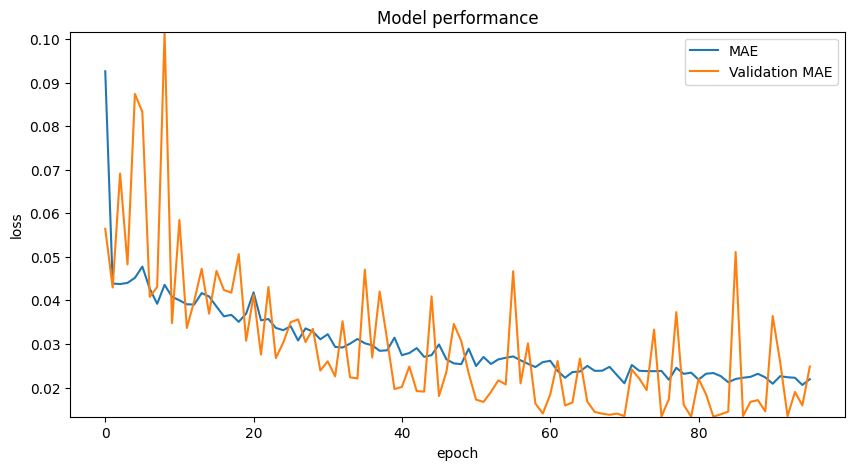

In [25]:
import matplotlib.pyplot as plt

plt.title("Model performance")

plt.plot(history.history["mae"], label = "MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")

plt.ylim([min(min(history.history["mae"]), min(history.history["val_mae"])), max(max(history.history["mae"]), max(history.history["val_mae"]))])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

5/5 [==============================] - 0s 9ms/step


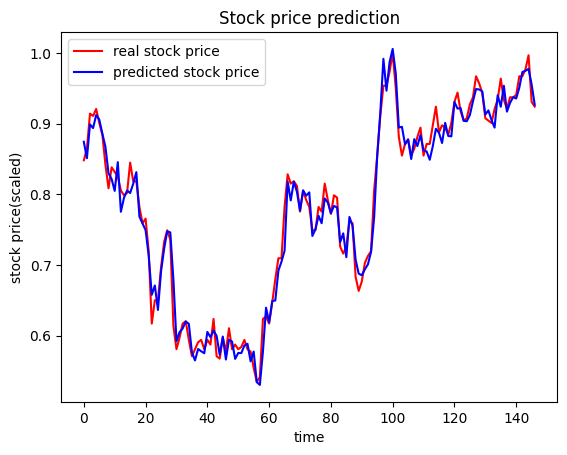

In [26]:
import matplotlib.pyplot as plt

pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('Stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price(scaled)')
plt.legend()
plt.show()

In [27]:
print(pred_y)

[[0.87439865]
 [0.85111713]
 [0.8989765 ]
 [0.8937237 ]
 [0.9122047 ]
 [0.90589994]
 [0.88592964]
 [0.86712986]
 [0.8296923 ]
 [0.82169527]
 [0.8047984 ]
 [0.84549785]
 [0.7753615 ]
 [0.79501325]
 [0.8053203 ]
 [0.80188245]
 [0.8150671 ]
 [0.8313374 ]
 [0.7683871 ]
 [0.75878406]
 [0.74939793]
 [0.7135449 ]
 [0.6578331 ]
 [0.6710829 ]
 [0.6364304 ]
 [0.69083613]
 [0.7230292 ]
 [0.7476713 ]
 [0.7460828 ]
 [0.6795846 ]
 [0.59224826]
 [0.605015  ]
 [0.6101893 ]
 [0.62012553]
 [0.61678565]
 [0.57649106]
 [0.5650583 ]
 [0.58117145]
 [0.57799053]
 [0.57519776]
 [0.6053252 ]
 [0.59802246]
 [0.60713685]
 [0.5997793 ]
 [0.5731907 ]
 [0.59876615]
 [0.5663381 ]
 [0.59422857]
 [0.5917381 ]
 [0.5672076 ]
 [0.5755907 ]
 [0.575463  ]
 [0.5862171 ]
 [0.5884992 ]
 [0.56370395]
 [0.5775981 ]
 [0.53434265]
 [0.5303829 ]
 [0.5777659 ]
 [0.6396224 ]
 [0.6189301 ]
 [0.6489881 ]
 [0.6498421 ]
 [0.6921143 ]
 [0.704702  ]
 [0.72021794]
 [0.8179351 ]
 [0.7914375 ]
 [0.81798565]
 [0.8035525 ]
 [0.77718234]
 [0.80

In [28]:
fiat_currency = "KRW"

print(f"Tomorrow's expected stock price: {(df['Close'].iloc[-1] * pred_y[-1]) / dfy['Close'].iloc[-1]} {fiat_currency}")

Tomorrow's expected stock price: [80828.75606444] KRW
